Credit Card Fraud Detection

Intro

Growing up, my father would always say "It's easier to get into credit card debt than to get out of it." It wasn't until years later that my mailbox seemed to endlessly supply me with credit card offers. Once I began working, I understood what he meant! What does a healthy credit card industry look like? It looks like an industry where cardholders can afford to pay their bills! According to the American Bankers Association’s Consumer Credit Delinquency Bulletin, delinquencies on bank cards fell in the third quarter of 2019, declining further below the 4.33% average that prevailed before the recession. Using this data, I will assess the driving factors behind credit card defaultees.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 100)

In [2]:
os.chdir(r'C:\Users\daenj\OneDrive\Desktop\Datasets\Capstone 2021')
os.getcwd()

'C:\\Users\\daenj\\OneDrive\\Desktop\\Datasets\\Capstone 2021'

Exploratory Data Analysis

In [3]:
#Importing data sets
nopay_data = pd.read_csv("nopayissues_data.csv")
nopay_data = nopay_data.drop(columns = "Unnamed: 0")

In [4]:
payissu_data = pd.read_csv("payissues_data.csv")
payissu_data = payissu_data.drop(columns = "Unnamed: 0")

In [5]:
clean_data = pd.read_csv("clean_data.csv")
clean_data = clean_data.drop(columns = "Unnamed: 0")

In [6]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

In [24]:
#Computing pairwise covariance betweens all variables
clean_data.cov().style.applymap(color_)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,210695144.102134,25.882714,27.625165,-23882877.675335,-448718.397600,129755.109109,-4289664.016427,0.075390,496.581882,-5926917.646342,89036.608563,146715.695275,0.158932,16.955058,-19.103792,-0.334536,-29.963808,8.940401,-0.500342,56.924355,50.739236,-248.251118,-23.682397,-10.431774,11.276498,-32.033347,-17.764027,2.885283,113763.537514
TARGET,25.882714,0.074296,0.005245,1864.734376,-3629.888696,-46.722914,-4196.387020,-0.000140,-0.243784,-1569.579022,-39.969980,-17.978379,0.000002,0.004212,0.002214,0.000075,-0.003819,0.000040,0.003233,0.009242,0.009192,-0.026371,0.000378,0.000019,-0.000259,0.002706,0.005135,0.003141,-12.647447
CNT_CHILDREN,27.625165,0.005245,0.524429,3904.467643,2078.225413,299.226568,628.912355,-0.000271,-2.830373,-24280.640453,-463.659006,36.334155,0.000010,0.066693,0.015380,-0.000100,-0.009512,0.004388,0.581204,0.008895,0.007670,-0.014869,-0.001018,0.001399,0.002358,0.003483,0.021535,0.019116,3.489607
AMT_INCOME_TOTAL,-23882877.675335,1864.734376,3904.467643,323758094942.682800,14774126781.431444,642165896.622001,13659565682.612135,217.954214,-107002.195569,-2358496532.952308,-16652992.646594,-2957107.833472,1.036110,6510.793281,-2176.449944,-79.442342,-601.076189,1884.687753,5802.623571,-10274.765695,-10842.819611,32499.719602,827.885715,3134.661999,2657.490037,-30.586937,-129.274371,139.441574,1800873.204498
AMT_CREDIT,-448718.397600,-3629.888696,2078.225413,14774126781.431444,161775676894.166992,4520766866.208537,146649528146.908997,531.159221,287331.561951,-3681044408.514701,-2350685.287793,5742566.903802,7.392146,10351.750229,-2872.986593,491.330109,3575.983637,1256.367316,24254.179419,-20047.923400,-21700.736296,75378.321005,1236.262981,4593.956112,4161.060080,-2819.784671,-2980.239360,298.955340,24772592.220094
AMT_ANNUITY,129755.109109,-46.722914,299.226568,642165896.622001,4520766866.208537,213497477.660744,4179188693.345941,23.357861,-1693.041236,-218593098.915438,-1626877.323258,-190316.786932,0.028092,607.212619,-129.143309,16.988297,33.257201,231.039120,1064.231050,-912.955961,-1000.122330,2495.206243,76.425783,259.227284,219.400373,-29.334719,3.957298,57.484182,808597.155765
AMT_GOODS_PRICE,-4289664.016427,-4196.387020,628.912355,13659565682.612135,146649528146.908997,4179188693.345941,136536453791.080170,508.330665,257844.499327,-3238094221.846435,-5550670.530501,6262066.816546,6.604539,9121.581436,557.434212,411.041394,5957.877004,1071.332765,21460.399065,-19032.425828,-20361.440661,80154.500636,1236.043598,4331.198663,3847.923599,-2612.764370,-3039.788328,-64.420093,23884676.751113
REGION_POPULATION_RELATIVE,0.075390,-0.000140,-0.000271,217.954214,531.159221,23.357861,508.330665,0.000189,0.004969,-12.879283,3.096927,0.082769,0.000000,0.000036,-0.000096,-0.000003,0.000587,0.000132,-0.000303,-0.003734,-0.003677,0.007500,0.000001,0.000181,0.000228,-0.000174,-0.000240,-0.000077,0.577600
DAYS_BIRTH,496.581882,-0.243784,-2.830373,-107002.195569,287331.561951,-1693.041236,257844.499327,0.004969,142.522667,1035304.889199,13976.337133,4856.475157,0.000470,-2.835027,-0.831729,0.007621,0.245361,-0.253317,-3.013663,-0.104156,-0.090592,-3.384514,-0.084521,-0.245684,-0.159276,-0.595110,-1.210488,-0.693452,762.804320
DAYS_EMPLOYED,-5926917.646342,-1569.579022,-24280.640453,-2358496532.952308,-3681044408.514701,-218593098.915438,-3238094221.846435,-12.879283,1035304.889199,19354608809.608204,102304275.110720,57213507.505472,1.543162,-53326.648484,-12946.674514,92.931204,1563.541387,-

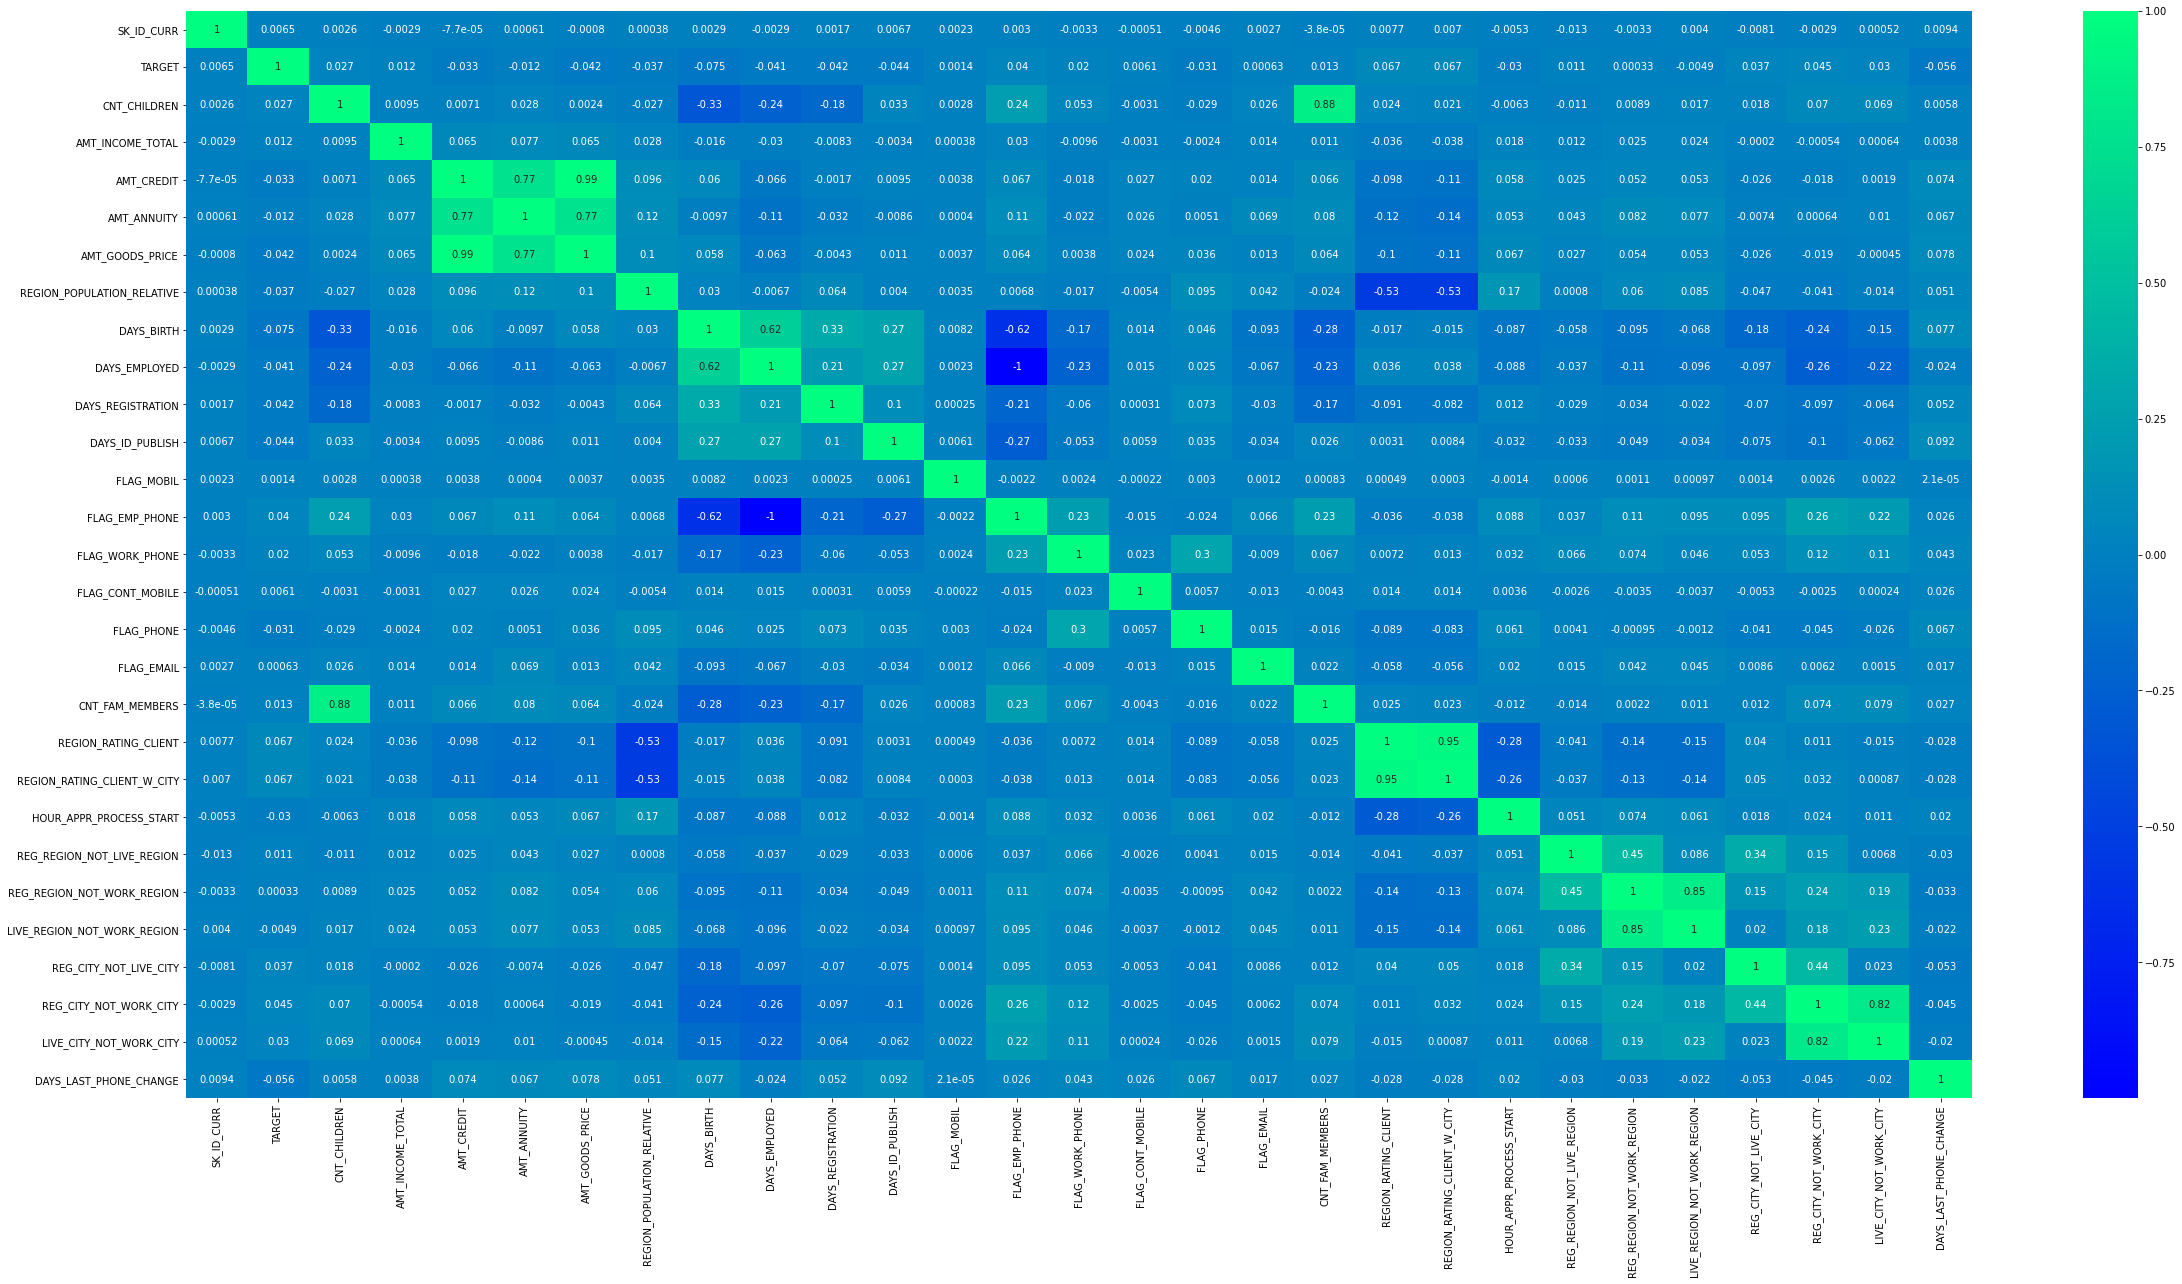

In [16]:
#Here is the pairwise correlation among variables
plt.figure(figsize = (40,20))
sns.heatmap(clean_data.corr(), annot=True, cmap='winter')

Let's look at the education types of borrowers with and without payment issues. As observed in the wrangling, applicants without payment issues are about 9% of the total applicants in this dataset. What's interesting is that at first glance, these bargraphs look identical. We can infer that those with secondary education make up most of the pool of applicants.

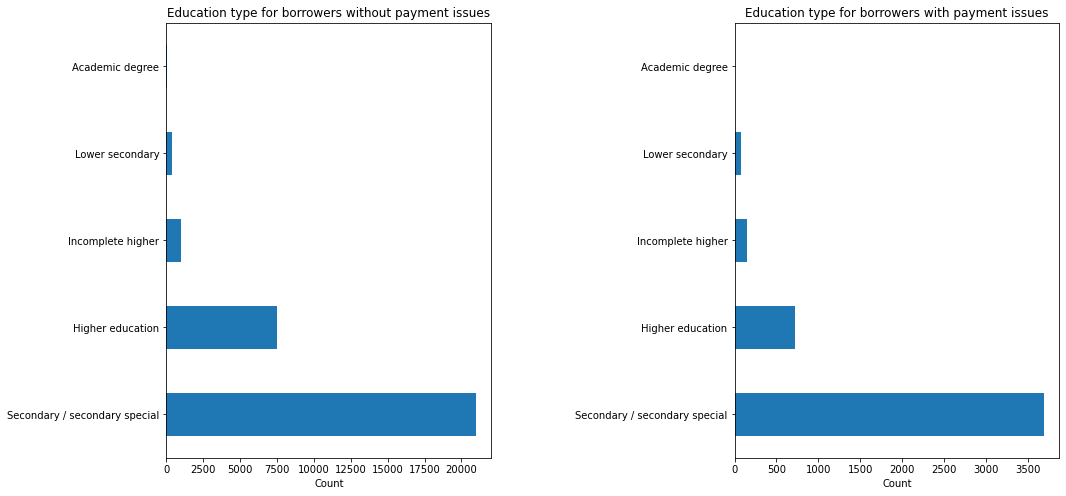

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

nopay_data.NAME_EDUCATION_TYPE.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Education type for borrowers without payment issues')
ax[0].set_xlabel('Count')

payissu_data.NAME_EDUCATION_TYPE.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Education type for borrowers with payment issues')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.75);

The trend between both bar graphs below is that those whose incomes are very low, high, or very high make up a small percentage of people borrowing money.
The low income range has the highest count in both applicants with NO payment difficulties and with payment difficulties. Medium range applicants are close behind in both cases.

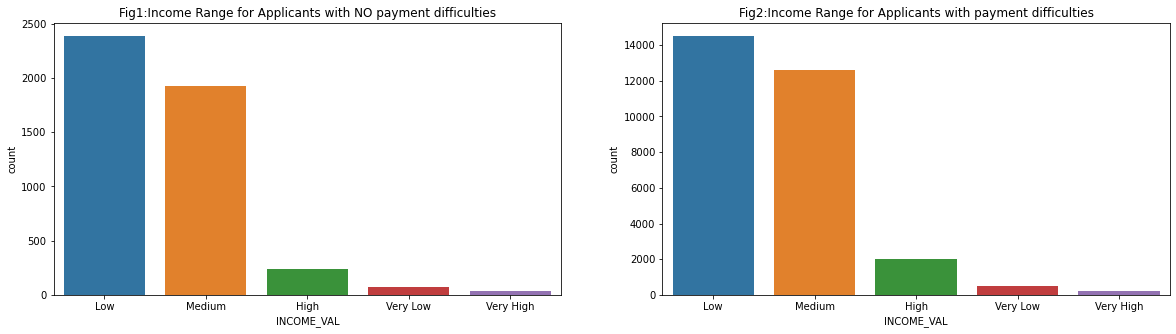

In [10]:
fig, ax =plt.subplots(1,2,figsize=[20,5])

sns.countplot(data=payissu_data,x = 'INCOME_VAL',order = payissu_data['INCOME_VAL'].value_counts().index,ax=ax[0])
sns.countplot(data=nopay_data,x = 'INCOME_VAL',order = nopay_data['INCOME_VAL'].value_counts().index,ax=ax[1])
ax[0].set_title('Fig1:Income Range for Applicants with NO payment difficulties')
ax[1].set_title('Fig2:Income Range for Applicants with payment difficulties')
plt.show()

Married couples account for many of the applicants. We are getting a clearer picture of what most of these applicants look like, according to this data. 

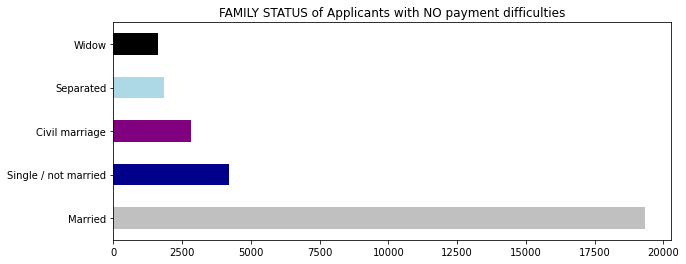

In [11]:
#Family status of potential borrowers with NO payment issues
plt.figure(figsize=[10,4])
nopay_data.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['silver', 'darkblue', 'purple', 'lightblue', 'black'])
plt.title('FAMILY STATUS of Applicants with NO payment difficulties')
plt.show()

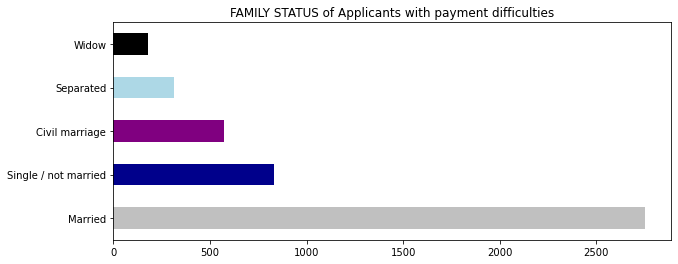

In [12]:
#Family status of potential borrowers with payment issues
plt.figure(figsize=[10,4])
payissu_data.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['silver', 'darkblue', 'purple', 'lightblue', 'black'])
plt.title('FAMILY STATUS of Applicants with payment difficulties')
plt.show()

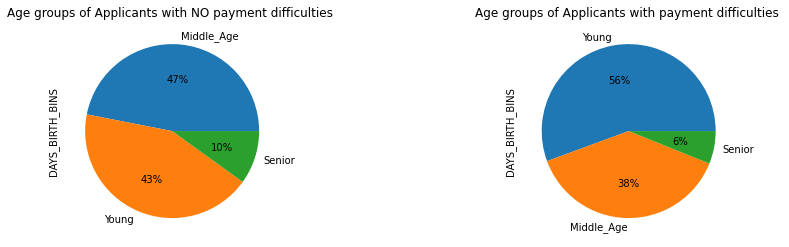

In [13]:
#An overwhelming majority of applicants are middle to lower class married couples.
fig =plt.subplots(1,2,figsize=[15,4])
plt.subplot(1,2,1)
nopay_data.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with NO payment difficulties ')
plt.subplot(1,2,2)
payissu_data.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with payment difficulties ')
plt.show()

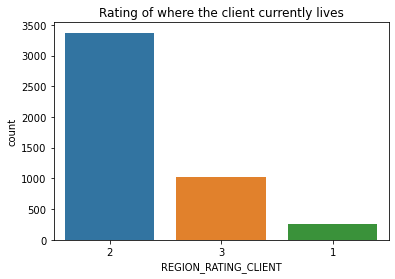

In [17]:
#Lets look at the region ratings.
#Based on what we've seen so far, it can be inferred that regions rated as 1 are affluent. They have no reason to seek out loans.  
sns.countplot(data=payissu_data,x = 'REGION_RATING_CLIENT',order = payissu_data['REGION_RATING_CLIENT'].value_counts().index)
plt.title('Rating of where the client currently lives')
plt.show()

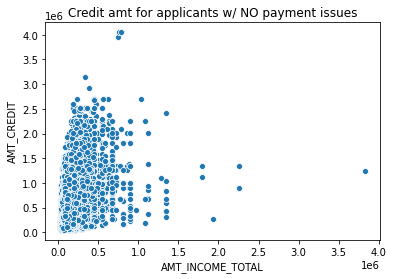

In [19]:
#High income does not equate to higher credit amounts. As stated earlier, most potential borrowers live a middle or lower class life.

sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=nopay_data)
plt.title('Credit amt for applicants w/ NO payment issues')
plt.show()

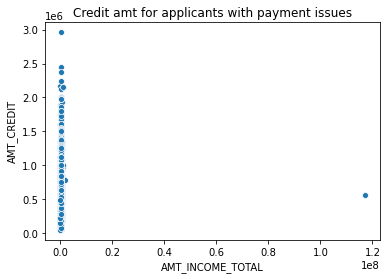

In [67]:
#In the case of those with payment issues, most are in lower class earners. There is one high income outlier that had payment issues.

sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=payissu_data)
plt.title('Credit amt for applicants with payment issues')
plt.show()

Descriptive Statistics for 'float' variables

In [60]:
clean_data.select_dtypes('float').agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
count,4.346300e+04,4.346300e+04,4.346300e+04,4.346300e+04,43463.000000,4.346300e+04,4.346300e+04,4.346300e+04,43463.000000,43463.000000
min,2.565000e+04,4.500000e+04,2.052000e+03,4.500000e+04,0.000533,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000
max,1.170000e+08,4.050000e+06,2.580255e+05,4.050000e+06,0.072508,3.652430e+05,2.124900e+04,6.228000e+03,13.000000,4002.000000
mad,6.917894e+04,3.168744e+05,1.099897e+04,2.888674e+05,0.010249,1.066568e+05,2.909252e+03,1.316959e+03,0.666881,699.244862
mean,1.710314e+05,5.998905e+05,2.713194e+04,5.390465e+05,0.020781,6.736189e+04,4.972046e+03,2.993086e+03,2.157839,966.423092
median,1.440000e+05,5.175000e+05,2.493900e+04,4.500000e+05,0.018850,2.222000e+03,4.482000e+03,3.255000e+03,2.000000,759.000000
quantile,1.440000e+05,5.175000e+05,2.493900e+04,4.500000e+05,0.018850,2.222000e+03,4.482000e+03,3.255000e+03,2.000000,759.000000
kurt,4.089593e+04,1.943379e+00,1.006656e+01,2.534495e+00,3.272358,8.025847e-01,-3.160246e-01,-1.108818e+00,1.833361,-0.319637
skew,1.991972e+02,1.223204e+00,1.735319e+00,1.350267e+00,1.484972,1.673615e+00,5.971457e-01,-3.488649e-01,0.963794,0.709619
var,3.237581e+11,1.617757e+11,2.134975e+08,1.365365e+11,0.000189,1.935461e+10,1.236996e+07,2.279069e+06,0.830547,688906.397904


Distributions for variables among applicants with payment issues. Most of the applicants that are struggling with payments are those with an outstanding credit amount of 1 million dollars or less. The most applicants are having payment issues with around half a million dollars of credit. Interestingly, it appears couples and singles have the most payment issues.

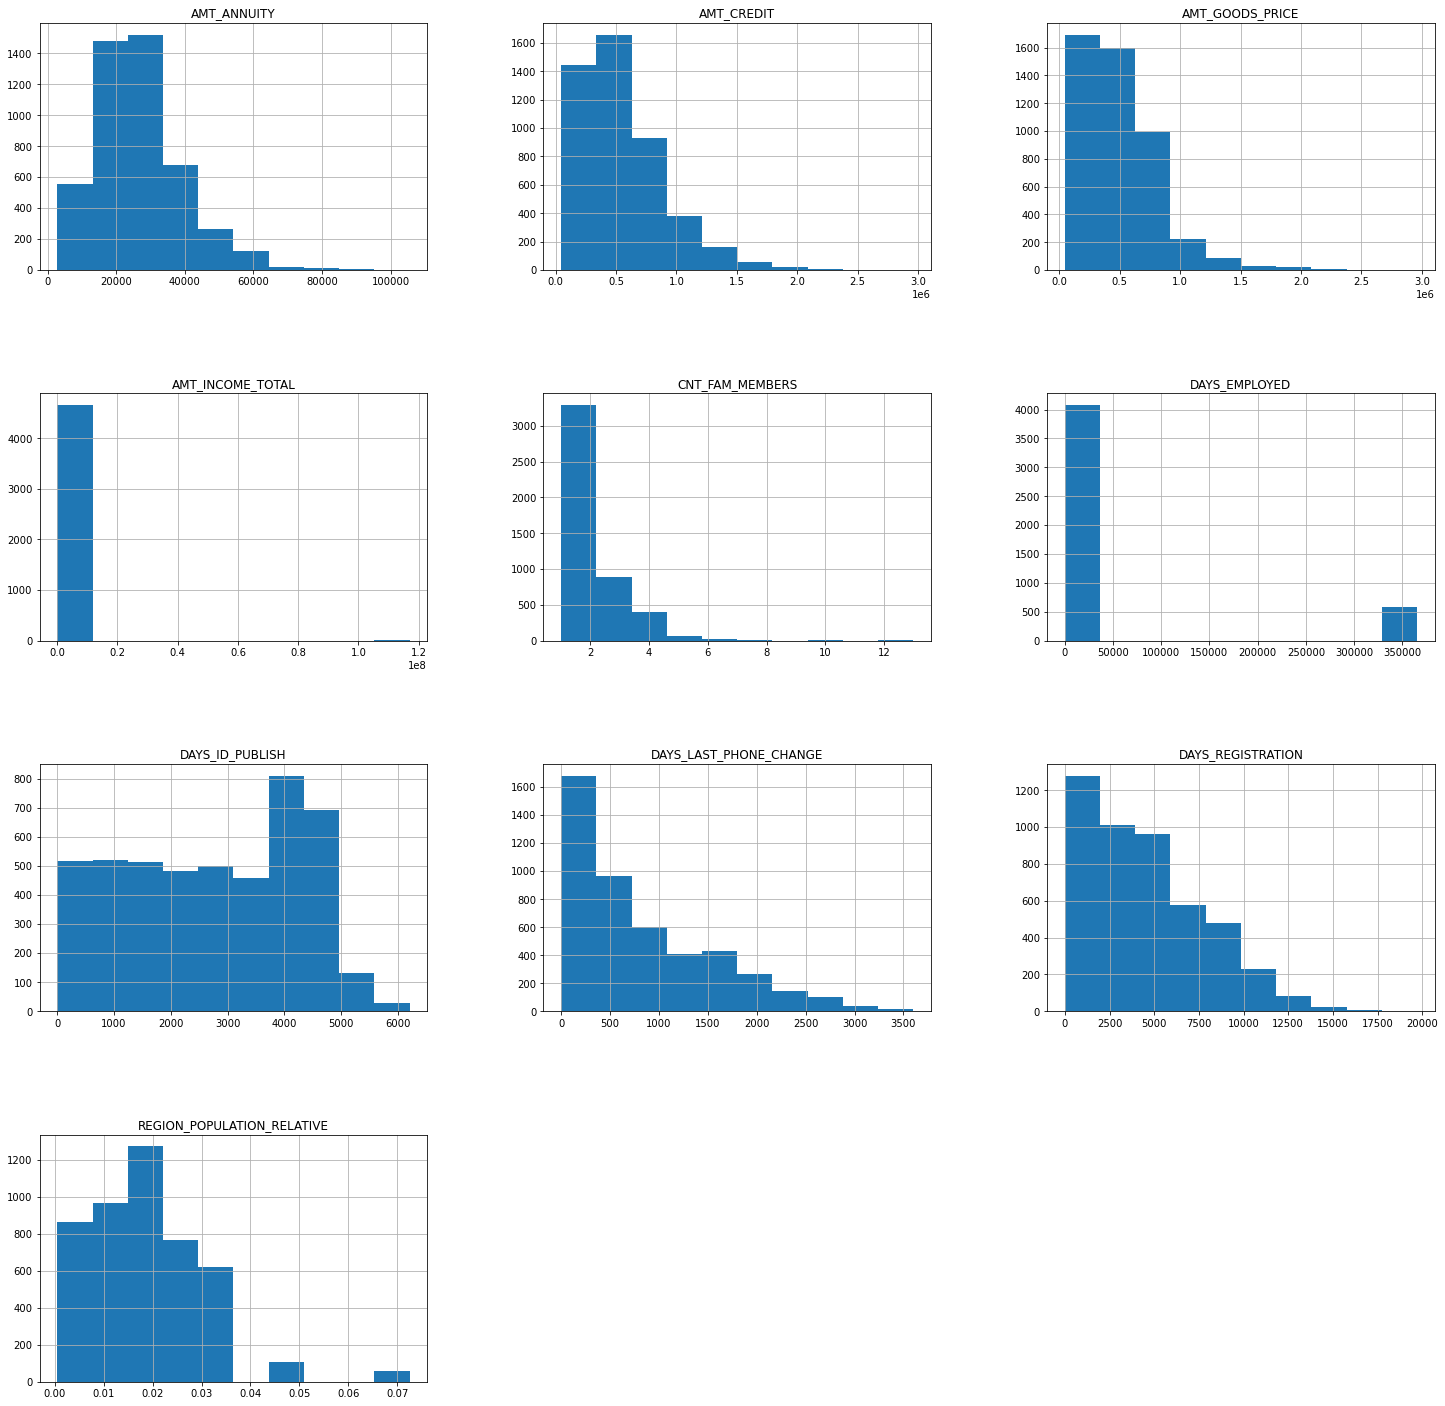

In [8]:
payissu_data.select_dtypes('float').hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5);

Distribution of variables among applicants with NO payment issues. Most applicants with no payment issues are taking out less than a million dollars of credit. Successful credit b

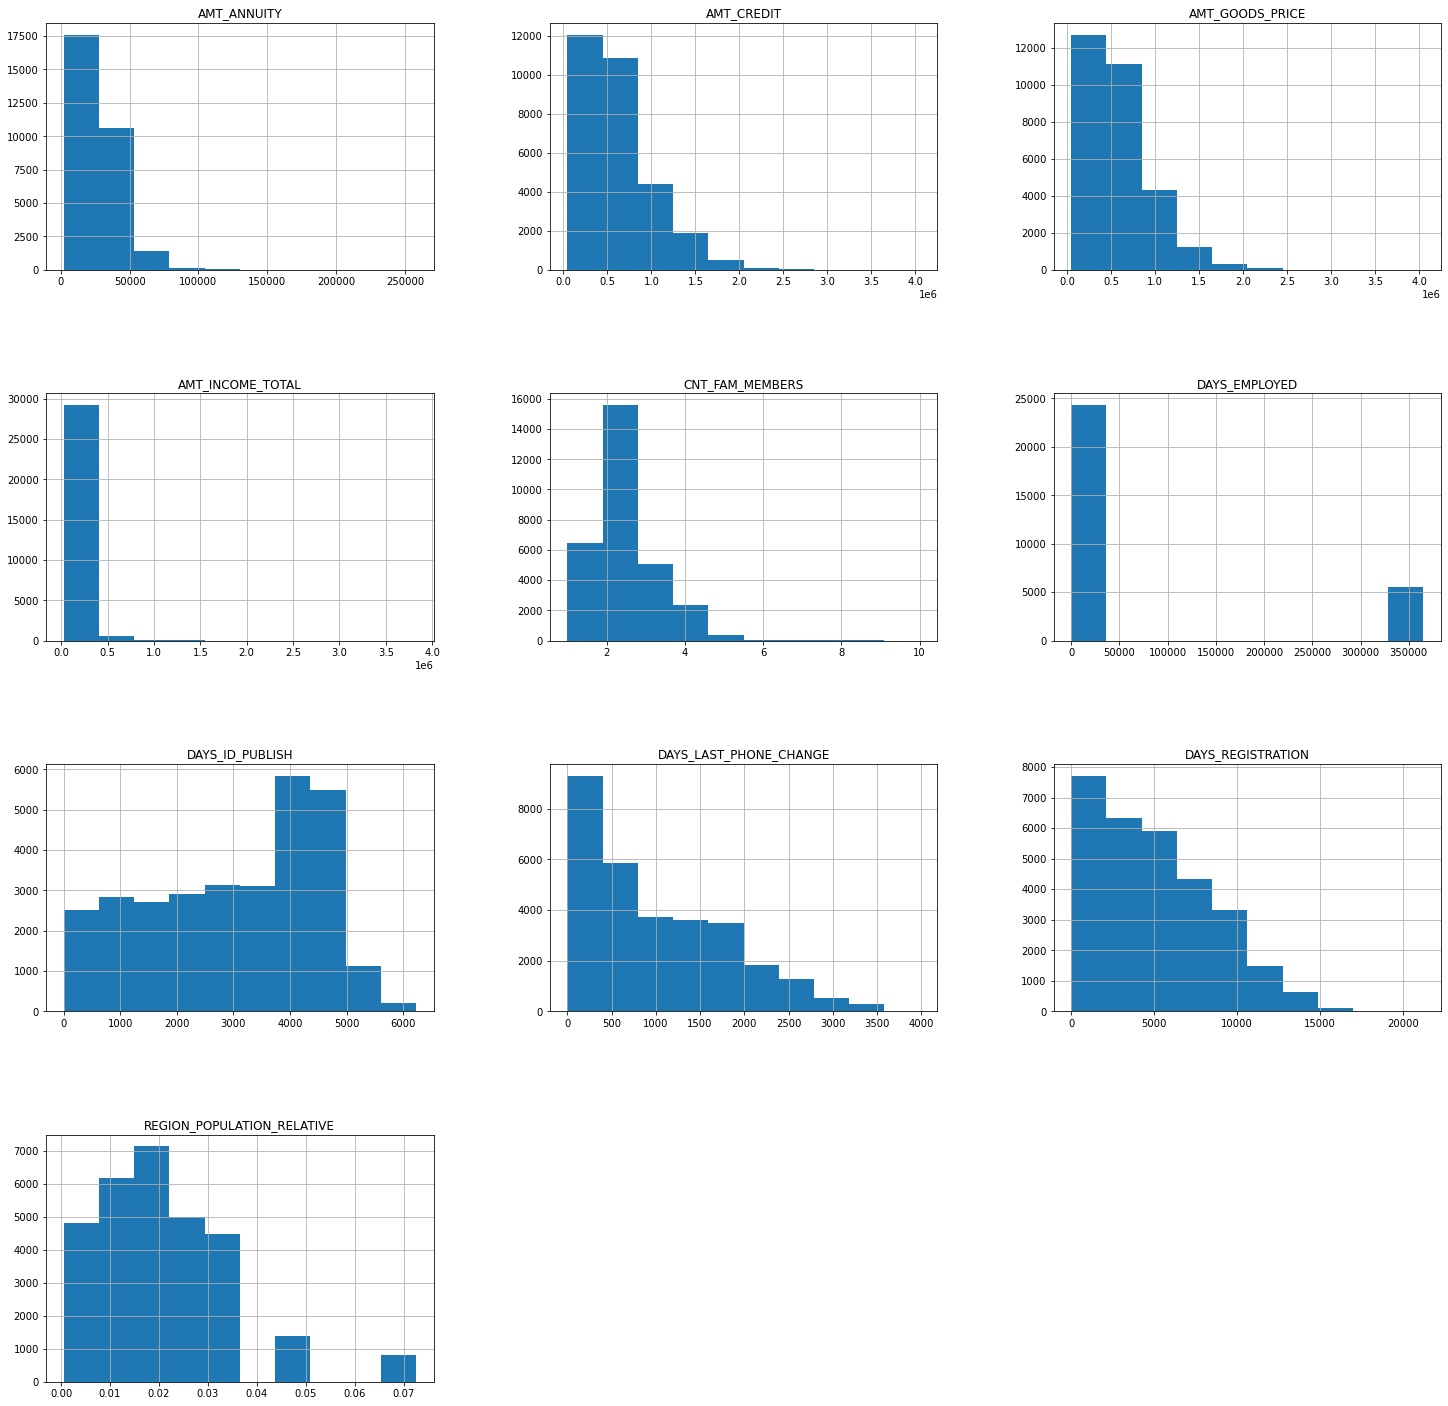

In [68]:
nopay_data.select_dtypes('float').hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5);